<a href="https://colab.research.google.com/github/technisekai/apple-and-orange-detection/blob/main/apple-orange-detection-gluoncv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for mxnet
!pip install --upgrade mxnet
# for pytorch
!pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

!pip install --upgrade gluoncv

     |████████████████████████████████| 46.9MB 66kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 154.6MB 82kB/s 
     |████████████████████████████████| 5.1MB 38.8MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0+cpu which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
     |████████████████████████████████| 1.1MB 20.7MB/s 
     |████████████████████████████████| 122kB 58.3MB/s 
     |████████████████████████████████| 317kB 47.8MB/s 
     |████████████████████████████████| 14.1MB 248kB/s 
     |████████████

In [ ]:
# import library
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
from google.colab import files

In [ ]:
# get pretrained model (mask rcnn with resnet50 backbone and use coco dataset(81 classes))
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)

100%|██████████| 131497/131497 [00:02<00:00, 51958.97KB/s]


In [ ]:
# fine-tunning but im skipped this
net.reset_class(classes=['apple', 'orange'], reuse_weights=['apple', 'orange'])

In [ ]:
# upload file thats want identifying 
uploaded = files.upload()

Saving m_merged.png to m_merged.png


In [ ]:
# find filename
for fn in uploaded.keys():
  fn

In [ ]:
# prediction
x, orig_img = data.transforms.presets.rcnn.load_test(fn)

In [ ]:
# result object, probability, make a box, masking from x value
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

In [ ]:
# make list of the result object with remove -1 value (-1 is mean for not detecting object)
id = []
for i in ids:
  if i[0] != -1.0:
    id.append(int(i[0]))

In [ ]:
# make list of score probability that greater than 0.01 (have accuracy above 10%)
prob = []
for i in scores:
  if i[0] != -1.0:
    if i[0] > 0.01:
      prob.append(float(i[0]))

In [ ]:
# make list of labels from list id
labels = []
for i in id:
  labels.append(net.classes[i])

In [ ]:
# slice labels according probability
labels = labels[:len(prob)]

This is an apple picture and have 92 fruits
This is an orange picture and have 107 fruits



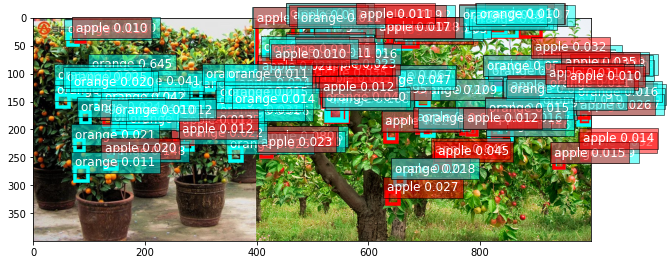

In [ ]:
# the result
if 'apple' in labels:
  print('This is an apple picture and have ' +str(labels.count('apple'))+ ' fruits')
if 'orange' in labels:
  print('This is an orange picture and have ' +str(labels.count('orange'))+ ' fruits')

print("")

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids, thresh=0.01,
                         class_names=net.classes, ax=ax)
plt.show()